## IS620 - Week 6 Assignment
## Two-Mode Networks
### Brian Chu | Oct 4, 2015

In [1]:
import davis_club as dc
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

*davis_club script source: https://networkx.github.io/documentation/latest/examples/algorithms/davis_club.html*

**Let's look at the women attending the events first**

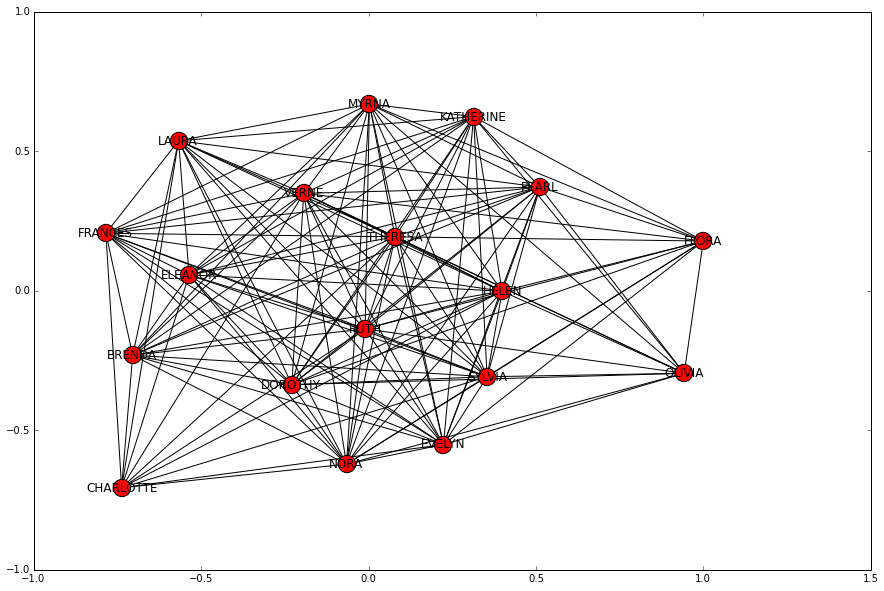

In [2]:
# Get bipartite data
(G, women, events) = dc.davis_club_graph()

# Project onto women node
w = dc.project(G, women) 

# Draw graph
plt.figure(figsize=(15,10))
nx.draw_networkx(w)
plt.show()

> Looks like a pretty well-connected network. Closeness and degree centrality would appear high.

**We can infer the connection strength and node similarity by weighting the edges based on common clubs.** 

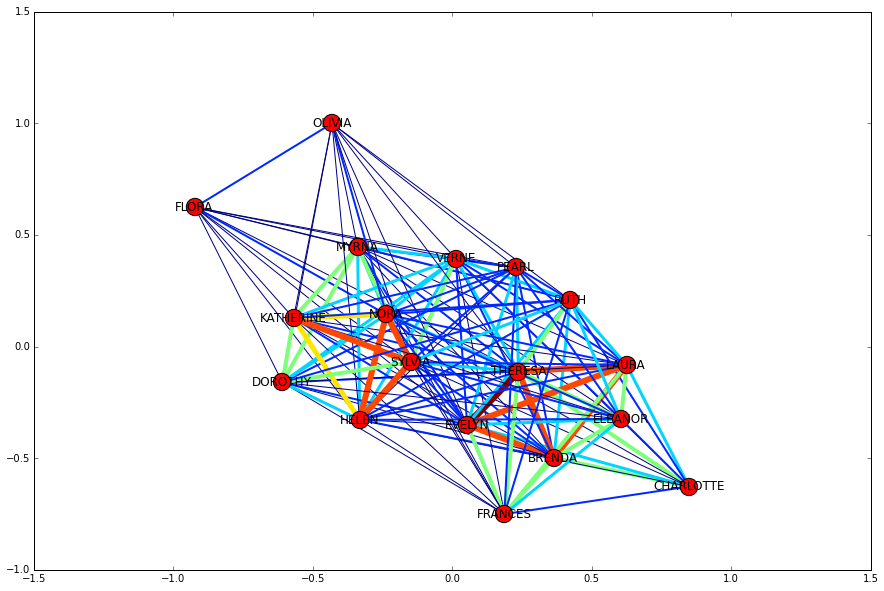

In [3]:
# SNAS Chapter 5
from networkx.algorithms import bipartite as bi

wnet = bi.weighted_projected_graph(G, w, ratio=False)
weights = [edata['weight'] for f,t,edata in wnet.edges(data=True)]
plt.figure(figsize = (15,10))
nx.draw_networkx(wnet, width=weights, edge_color=weights)

**It appears there are a couple of strong sub-networks between [Laura, Evelyn, Brenda, Theresa] and [Helen, Sylvia, Nora, Katherine].  
Let's calculate betweenness centrality.**

In [4]:
wnet_btw = nx.betweenness_centrality(wnet)
wnet_btw = {k:round(v,3) for k, v in wnet_btw.items()}

def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

wnet_btw = sorted_map(wnet_btw)
wnet_btw

[('EVELYN', 0.01),
 ('HELEN', 0.01),
 ('NORA', 0.01),
 ('RUTH', 0.01),
 ('SYLVIA', 0.01),
 ('THERESA', 0.01),
 ('VERNE', 0.01),
 ('DOROTHY', 0.005),
 ('KATHERINE', 0.005),
 ('MYRNA', 0.005),
 ('PEARL', 0.005),
 ('BRENDA', 0.003),
 ('ELEANOR', 0.003),
 ('FRANCES', 0.003),
 ('LAURA', 0.003),
 ('CHARLOTTE', 0.0),
 ('FLORA', 0.0),
 ('OLIVIA', 0.0)]

> We see most of our aforementioned names here. Ruth and verne are interesting. While they were not part of the two strong sub-networks, they are clearly boundary spanners with some of the peripheral members and events.

**Let's look at events now using the same bipartite projection method.**

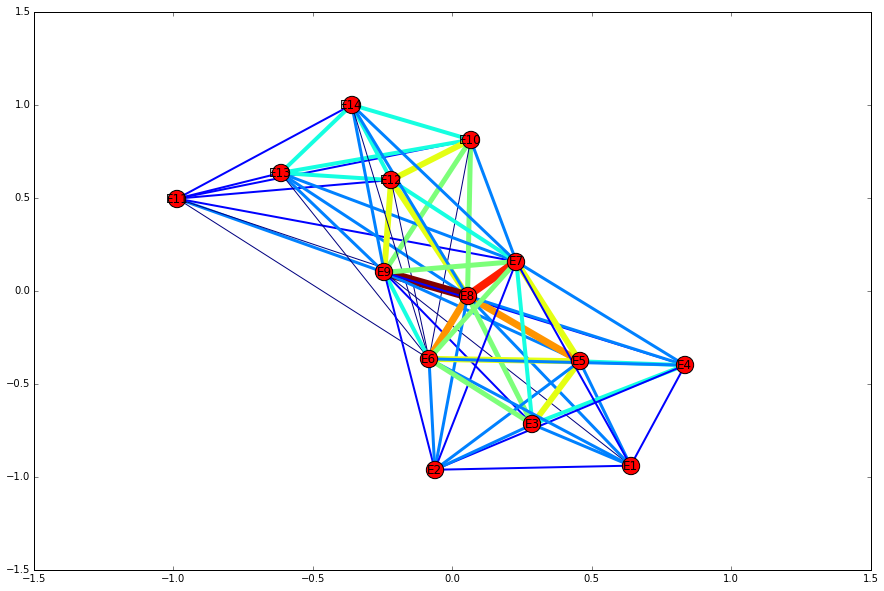

In [5]:
e = dc.project(G, events)
enet = bi.weighted_projected_graph(G, e)
enet.edges(data=True)
weights=[edata['weight'] for f,t,edata in enet.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(enet, width=weights, edge_color=weights)

**This is interesting. Compared to the women who seemed to share many similar events, a few events (E7, E8, and E9) seem to have really large attendance. Let's look at degrees for each event**

In [6]:
edeg = nx.degree(e)
edeg = {k:round(v,1) for k, v in edeg.items()}
edeg = sorted_map(edeg)
edeg

[('E6', 15.0),
 ('E7', 15.0),
 ('E8', 15.0),
 ('E9', 15.0),
 ('E1', 10.0),
 ('E10', 10.0),
 ('E11', 10.0),
 ('E12', 10.0),
 ('E13', 10.0),
 ('E14', 10.0),
 ('E2', 10.0),
 ('E3', 10.0),
 ('E4', 10.0),
 ('E5', 10.0)]

**If we subset E8 and E9, we would expect to find mostly common edges since they each span so many women members.**

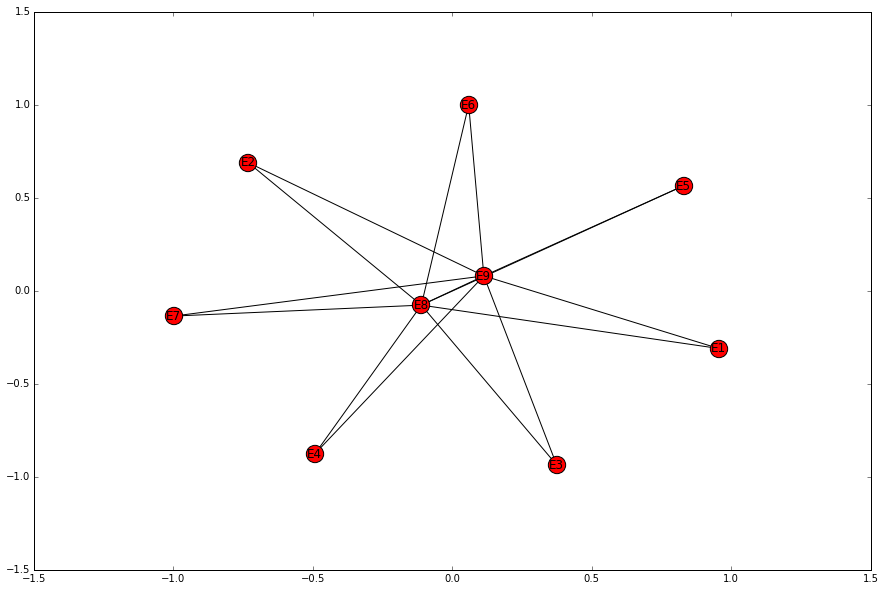

In [7]:
event_center = ["E8", "E9"]
ehigh = nx.Graph([(k,v) for k,v in enet.edges() if k in event_center])
ehigh.edges()
plt.figure(figsize=(15,10))
nx.draw_networkx(ehigh)


> Indeed, this is what we see - a perfect dual-node starburst!

**Conclusion: ** We can infer this is a really centralized closed network. There are a couple groups of women who attend almost all the same events, as well as a couple boundary spanners who are attend many events. There are also a small number of events whose attendance includes almost all the women in the network.
  
If there were more node attributes, it would be interesting to see what characteristics are similar and different in each of the two strong women sub-groups that make them attend the same events (e.g. where they live). More information on the events might also shed light on why some are more popular than others (e.g. cost, location, free booze).